In [2]:
import os
import pandas as pd
import torch
import torchaudio
import matplotlib.pyplot as plt
from collections import Counter

stage1_train / stage2_train 의 길이 파악


In [8]:
import json

stage1_train = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"
stage2_train = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

data_stage1 = read_json(stage1_train)
data_stage2 = read_json(stage2_train)

print(f"Stage 1 Total Annotations: {len(data_stage1['annotation'])}")
print(f"Stage 2 Total Annotations: {len(data_stage2['annotation'])}")

# stage1의 첫번째 항목 출력 
print("\nSample from Stage 1:")
print(data_stage1['annotation'][0])

#


Stage 1 Total Annotations: 1573558
Stage 2 Total Annotations: 1403890

Sample from Stage 1:
{'path': '/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac', 'text': 'Chapter one missus rachel lynde is surprised missus rachel lynde lived just where the avonlea main road dipped down into a little hollow fringed with alders and ladies eardrops and traversed by a brook', 'task': 'asr'}


각각의 json 파일안에 어떤 테스크들이 존재하고, 각 테스크에 대한 데이터가 몇 개인지 확인하는 코드


In [5]:
# JSON 파일 읽기 함수
from collections import Counter
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# `task`별 데이터 카운트 함수
def count_tasks(data):
    tasks = [item['task'] for item in data['annotation']]
    return Counter(tasks)

# JSON 데이터 읽기
data_stage1 = read_json(stage1_train)
data_stage2 = read_json(stage2_train)

# `task`별 카운트
task_counts_stage1 = count_tasks(data_stage1)
task_counts_stage2 = count_tasks(data_stage2)

# 결과 출력
print("Task Counts for Stage 1:")
for task, count in task_counts_stage1.items():
    print(f"{task}: {count}")

print("\nTask Counts for Stage 2:")
for task, count in task_counts_stage2.items():
    print(f"{task}: {count}")

Task Counts for Stage 1:
asr: 1191381
audiocaption: 382177

Task Counts for Stage 2:
asr: 481241
QA: 551759
phone_recognition: 281239
audiocaption_v2: 61112
gender_recognition: 28539


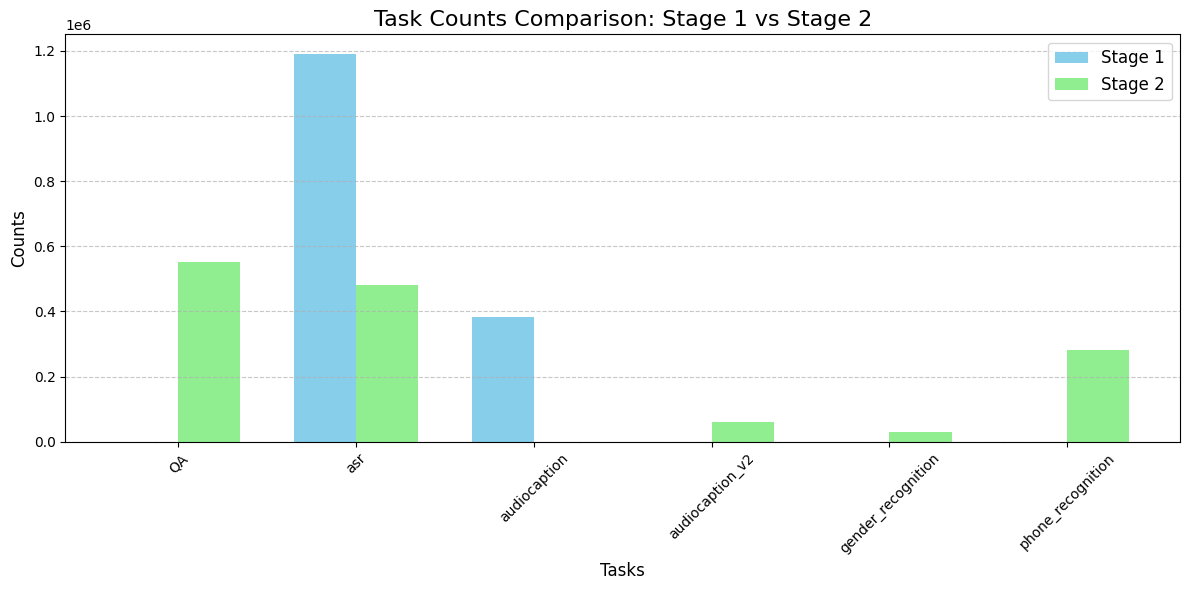

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Task별 결과 데이터
task_counts_stage1 = {"asr": 1191381, "audiocaption": 382177}
task_counts_stage2 = {
    "asr": 481241,
    "QA": 551759,
    "phone_recognition": 281239,
    "audiocaption_v2": 61112,
    "gender_recognition": 28539,
}

all_tasks = list(set(task_counts_stage1.keys()).union(task_counts_stage2.keys()))
all_tasks.sort()  
stage1_counts = [task_counts_stage1.get(task, 0) for task in all_tasks]
stage2_counts = [task_counts_stage2.get(task, 0) for task in all_tasks]

x = np.arange(len(all_tasks))  
width = 0.35 

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, stage1_counts, width, label="Stage 1", color="skyblue")
plt.bar(x + width/2, stage2_counts, width, label="Stage 2", color="lightgreen")

plt.xlabel("Tasks", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Task Counts Comparison: Stage 1 vs Stage 2", fontsize=16)
plt.xticks(x, all_tasks, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  

plt.show()


datasets = ["audiocaps", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"] 데이터들이 각각 몇개 존재하는 지 파악


In [4]:
import json
from collections import Counter

# JSON 파일 읽기 함수
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# 데이터셋별 파일 개수 카운트 함수
def count_datasets_by_path(data, datasets):
    paths = [item['path'] for item in data['annotation']]
    dataset_counts = Counter()
    for path in paths:
        for dataset in datasets:
            if dataset in path:  # path에 데이터셋 이름이 포함되어 있는지 확인
                dataset_counts[dataset] += 1
                break
    return dataset_counts

# 데이터셋 이름 리스트
datasets = ["audiocaps", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"]

# JSON 데이터 읽기
data_stage1 = read_json(stage1_train)
data_stage2 = read_json(stage2_train)

# 데이터셋별 카운트
dataset_counts_stage1 = count_datasets_by_path(data_stage1, datasets)
dataset_counts_stage2 = count_datasets_by_path(data_stage2, datasets)

# 결과 출력
print("Dataset Counts for Stage 1:")
for dataset, count in dataset_counts_stage1.items():
    print(f"{dataset}: {count}")

print("\nDataset Counts for Stage 2:")
for dataset, count in dataset_counts_stage2.items():
    print(f"{dataset}: {count}")



Dataset Counts for Stage 1:
LibriSpeech: 281241
GigaSpeech: 910140
WavCaps: 367712
Clotho: 14465

Dataset Counts for Stage 2:
GigaSpeech: 200000
LibriSpeech: 872056
WavCaps: 270402
audiocaps: 46647
Clotho: 14465
MusicNet: 320


6개의 데이터셋이 stage1 / stage2 에 몇 개씩 분포 했는 지 체크하는 함수


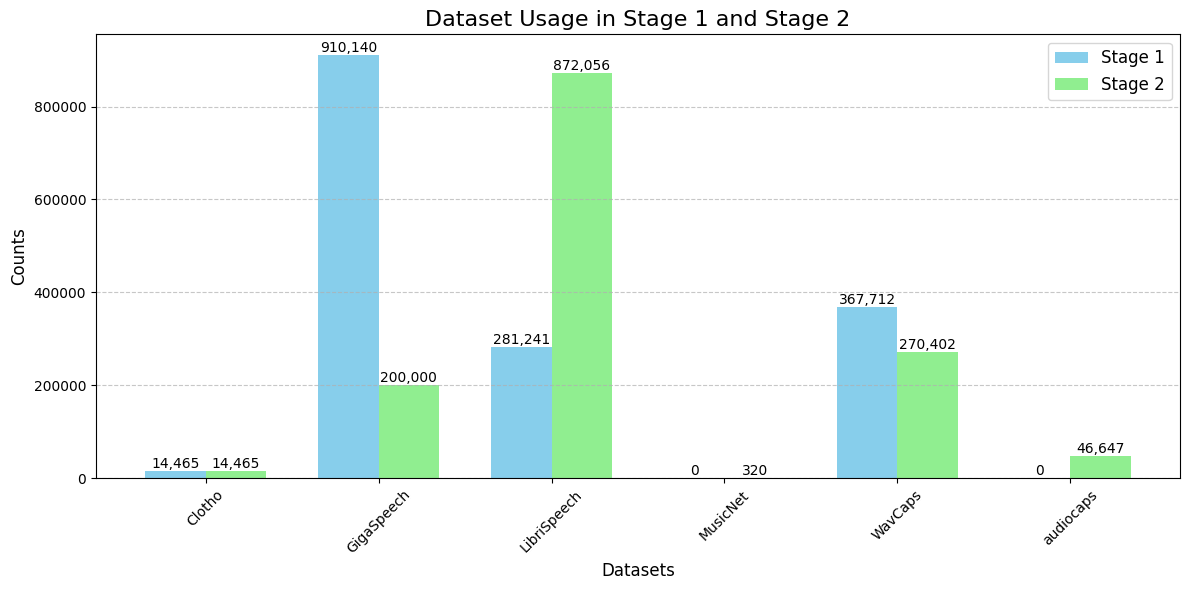

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset counts (Stage 1 & Stage 2)
dataset_counts_stage1 = {
    "LibriSpeech": 281241,
    "GigaSpeech": 910140,
    "WavCaps": 367712,
    "Clotho": 14465,
}
dataset_counts_stage2 = {
    "GigaSpeech": 200000,
    "LibriSpeech": 872056,
    "WavCaps": 270402,
    "audiocaps": 46647,
    "Clotho": 14465,
    "MusicNet": 320,
}

# 모든 데이터셋 리스트 생성
datasets = list(set(dataset_counts_stage1.keys()).union(dataset_counts_stage2.keys()))
datasets.sort()  # 알파벳 순 정렬

# Stage 1과 Stage 2 데이터 준비
stage1_counts = [dataset_counts_stage1.get(ds, 0) for ds in datasets]
stage2_counts = [dataset_counts_stage2.get(ds, 0) for ds in datasets]

# Bar Plot 그리기
x = np.arange(len(datasets))  # x축 위치
width = 0.35  # 바 너비

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, stage1_counts, width, label="Stage 1", color="skyblue")
bar2 = plt.bar(x + width/2, stage2_counts, width, label="Stage 2", color="lightgreen")

# Bar 위에 수치 표시
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,}', 
             ha='center', va='bottom', fontsize=10)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,}', 
             ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.xlabel("Datasets", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Dataset Usage in Stage 1 and Stage 2", fontsize=16)
plt.xticks(x, datasets, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # 레이아웃 자동 조정

# 그래프 표시
plt.show()



6개의 데이터셋 폴더들이 각각 어떤 task 를 하는 지 확인

In [1]:
import json
from collections import Counter

def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def count_tasks_by_dataset(data, datasets):
    dataset_task_counts = {dataset: Counter() for dataset in datasets}
    for item in data['annotation']:
        path = item['path']
        task = item['task']
        for dataset in datasets:
            if dataset in path: 
                dataset_task_counts[dataset][task] += 1
                break
    return dataset_task_counts

datasets = ["GigaSpeech", "LibriSpeech", "WavCaps", "audiocaps", "Clotho", "MusicNet"]

data_stage1 = read_json(stage1_train)
data_stage2 = read_json(stage2_train)

task_counts_stage1 = count_tasks_by_dataset(data_stage1, datasets)
task_counts_stage2 = count_tasks_by_dataset(data_stage2, datasets)

print("Task Counts for Stage 1:")
for dataset, tasks in task_counts_stage1.items():
    print(f"{dataset}: {dict(tasks)}")

print("\nTask Counts for Stage 2:")
for dataset, tasks in task_counts_stage2.items():
    print(f"{dataset}: {dict(tasks)}")


Task Counts for Stage 1:
GigaSpeech: {'asr': 910140}
LibriSpeech: {'asr': 281241}
WavCaps: {'audiocaption': 367712}
audiocaps: {}
Clotho: {'audiocaption': 14465}
MusicNet: {}

Task Counts for Stage 2:
GigaSpeech: {'asr': 200000}
LibriSpeech: {'QA': 281037, 'asr': 281241, 'phone_recognition': 281239, 'gender_recognition': 28539}
WavCaps: {'QA': 270402}
audiocaps: {'audiocaption_v2': 46647}
Clotho: {'audiocaption_v2': 14465}
MusicNet: {'QA': 320}


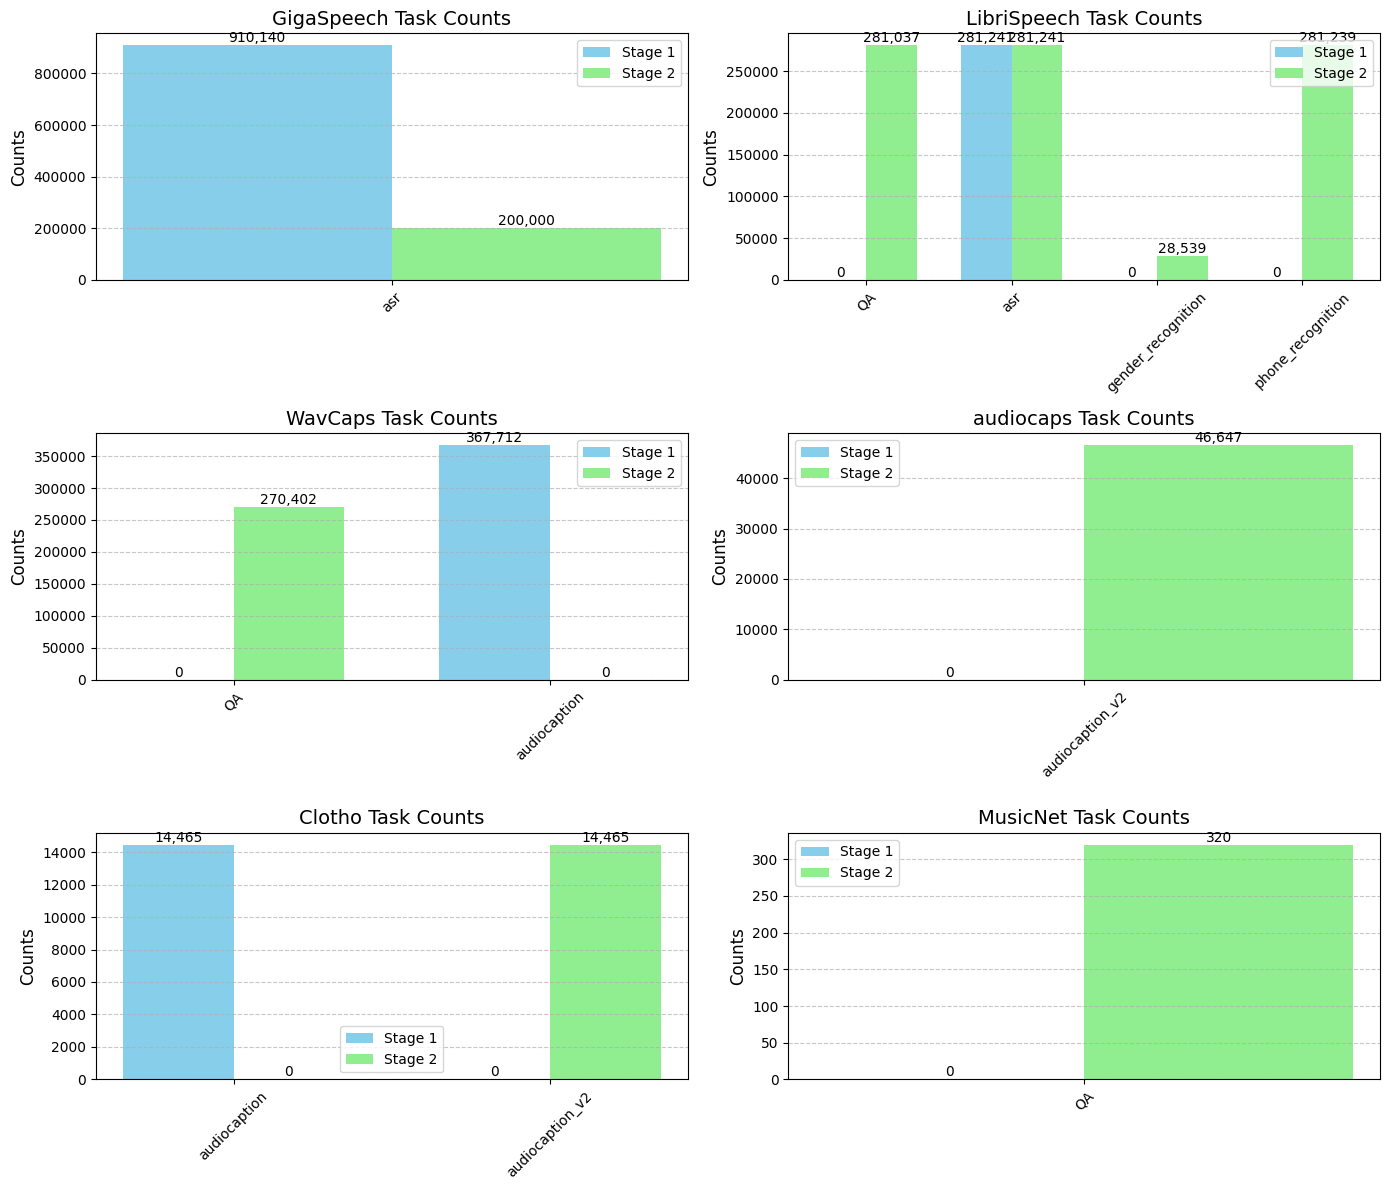

In [7]:
import matplotlib.pyplot as plt
import numpy as np

task_counts_stage1 = {
    "GigaSpeech": {'asr': 910140},
    "LibriSpeech": {'asr': 281241},
    "WavCaps": {'audiocaption': 367712},
    "audiocaps": {},
    "Clotho": {'audiocaption': 14465},
    "MusicNet": {}
}

task_counts_stage2 = {
    "GigaSpeech": {'asr': 200000},
    "LibriSpeech": {'QA': 281037, 'asr': 281241, 'phone_recognition': 281239, 'gender_recognition': 28539},
    "WavCaps": {'QA': 270402},
    "audiocaps": {'audiocaption_v2': 46647},
    "Clotho": {'audiocaption_v2': 14465},
    "MusicNet": {'QA': 320}
}

datasets = ["GigaSpeech", "LibriSpeech", "WavCaps", "audiocaps", "Clotho", "MusicNet"]

fig, axes = plt.subplots(3, 2, figsize=(14, 12)) 
axes = axes.flatten() 

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    stage1_tasks = task_counts_stage1.get(dataset, {})
    stage2_tasks = task_counts_stage2.get(dataset, {})
    
    tasks = list(set(stage1_tasks.keys()).union(stage2_tasks.keys()))
    tasks.sort()
    stage1_values = [stage1_tasks.get(task, 0) for task in tasks]
    stage2_values = [stage2_tasks.get(task, 0) for task in tasks]

    x = np.arange(len(tasks))
    width = 0.35
    bar1 = ax.bar(x - width/2, stage1_values, width, label="Stage 1", color="skyblue")
    bar2 = ax.bar(x + width/2, stage2_values, width, label="Stage 2", color="lightgreen")
    
    for bar in bar1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,}',
                ha='center', va='bottom', fontsize=10)
    for bar in bar2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,}',
                ha='center', va='bottom', fontsize=10)

    ax.set_title(f"{dataset} Task Counts", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(tasks, rotation=45, fontsize=10)
    ax.set_ylabel("Counts", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


# Text 필드 분석
EDA 인사이트

- 문장 길이 분포:
- 어휘 다양성
- 단어 빈도 분석
- 불용어 비율

### stage1_train.json text 필드 분석


Total number of sentences: 1573558
Average tokens per sentence: 14.43
Median tokens per sentence: 10.00
Max tokens in a sentence: 87
Min tokens in a sentence: 1


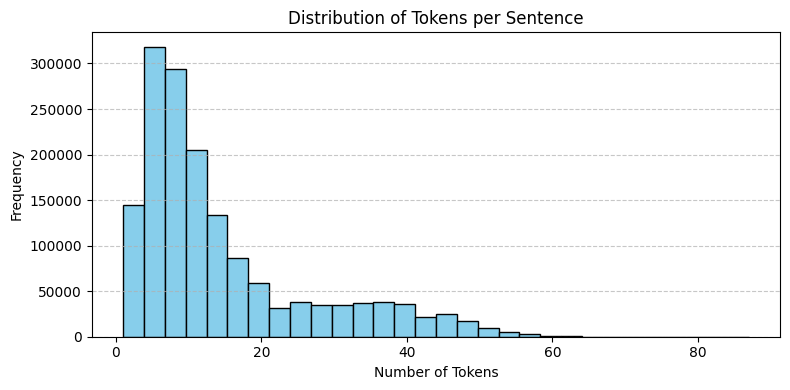


Total words: 22710800
Unique words: 161416

Top 10 words (after basic preprocessing):
the: 1108847
and: 816745
a: 710163
of: 564824
to: 556498
is: 420327
in: 368574
that: 300867
i: 286670
it: 227433

Stopword Count: 11226983 (49.43%)


In [12]:
import json
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

json_file_path = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"

with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

annotations = data['annotation']

texts = [item['text'] for item in annotations]

# 3. 텍스트 전처리 (예시 - 소문자, 알파벳/공백만 남기기)
processed_texts = []
for txt in texts:
    # 소문자 변환
    txt = txt.lower()
    # 알파벳과 공백만 남기기 (필요에 따라 조정)
    txt = re.sub(r'[^a-z\s]', '', txt)
    # 연속된 공백 정리
    txt = re.sub(r'\s+', ' ', txt).strip()
    processed_texts.append(txt)

# 4. 간단한 토큰화 (공백 기준)
tokenized_texts = [txt.split() for txt in processed_texts]

# 5. 길이 분석
lengths = [len(tokens) for tokens in tokenized_texts]  # 각 문장의 단어 수
print(f"Total number of sentences: {len(lengths)}")
print(f"Average tokens per sentence: {np.mean(lengths):.2f}")
print(f"Median tokens per sentence: {np.median(lengths):.2f}")
print(f"Max tokens in a sentence: {np.max(lengths)}")
print(f"Min tokens in a sentence: {np.min(lengths)}")

plt.figure(figsize=(8, 4))
plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tokens per Sentence")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#어휘 분석
all_tokens = [token for tokens in tokenized_texts for token in tokens]
total_words = len(all_tokens)
unique_words = len(set(all_tokens))
print(f"\nTotal words: {total_words}")
print(f"Unique words: {unique_words}")

# 상위 10개 빈도 단어
word_freq = Counter(all_tokens)
top_10 = word_freq.most_common(10)
print("\nTop 10 words (after basic preprocessing):")
for word, freq in top_10:
    print(f"{word}: {freq}")

#불용어(stopwords) 분석 (영어 기준)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword_count = sum(freq for word, freq in word_freq.items() if word in stop_words)
print(f"\nStopword Count: {stopword_count} ({stopword_count / total_words * 100:.2f}%)")


Total number of sentences: 1403890
Average tokens per sentence: 37.45
Median tokens per sentence: 14.00
Max tokens in a sentence: 407
Min tokens in a sentence: 0


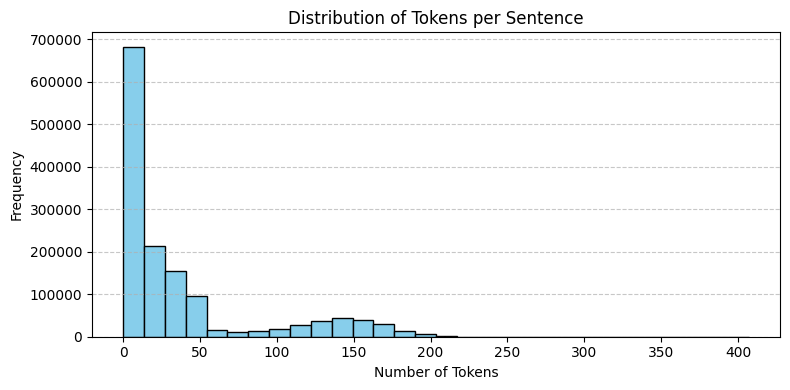


Total words: 52579306
Unique words: 121565

Top 10 words (after basic preprocessing):
ah: 3428049
n: 2391672
t: 2329009
ih: 2045786
sil: 1929707
d: 1670666
s: 1577462
r: 1375313
l: 1320822
iy: 1228892

Stopword Count: 15311315 (29.12%)


In [13]:
import json
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

json_file_path = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

annotations = data['annotation']

texts = [item['text'] for item in annotations]

# 3. 텍스트 전처리 (예시 - 소문자, 알파벳/공백만 남기기)
processed_texts = []
for txt in texts:
    # 소문자 변환
    txt = txt.lower()
    # 알파벳과 공백만 남기기 (필요에 따라 조정)
    txt = re.sub(r'[^a-z\s]', '', txt)
    # 연속된 공백 정리
    txt = re.sub(r'\s+', ' ', txt).strip()
    processed_texts.append(txt)

# 4. 간단한 토큰화 (공백 기준)
tokenized_texts = [txt.split() for txt in processed_texts]

# 5. 길이 분석
lengths = [len(tokens) for tokens in tokenized_texts]  # 각 문장의 단어 수
print(f"Total number of sentences: {len(lengths)}")
print(f"Average tokens per sentence: {np.mean(lengths):.2f}")
print(f"Median tokens per sentence: {np.median(lengths):.2f}")
print(f"Max tokens in a sentence: {np.max(lengths)}")
print(f"Min tokens in a sentence: {np.min(lengths)}")

plt.figure(figsize=(8, 4))
plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tokens per Sentence")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#어휘 분석
all_tokens = [token for tokens in tokenized_texts for token in tokens]
total_words = len(all_tokens)
unique_words = len(set(all_tokens))
print(f"\nTotal words: {total_words}")
print(f"Unique words: {unique_words}")

# 상위 10개 빈도 단어
word_freq = Counter(all_tokens)
top_10 = word_freq.most_common(10)
print("\nTop 10 words (after basic preprocessing):")
for word, freq in top_10:
    print(f"{word}: {freq}")

#불용어(stopwords) 분석 (영어 기준)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword_count = sum(freq for word, freq in word_freq.items() if word in stop_words)
print(f"\nStopword Count: {stopword_count} ({stopword_count / total_words * 100:.2f}%)")


Stage 1 평균 출력 토큰 수: 14.43
Stage 2 평균 출력 토큰 수: 37.45


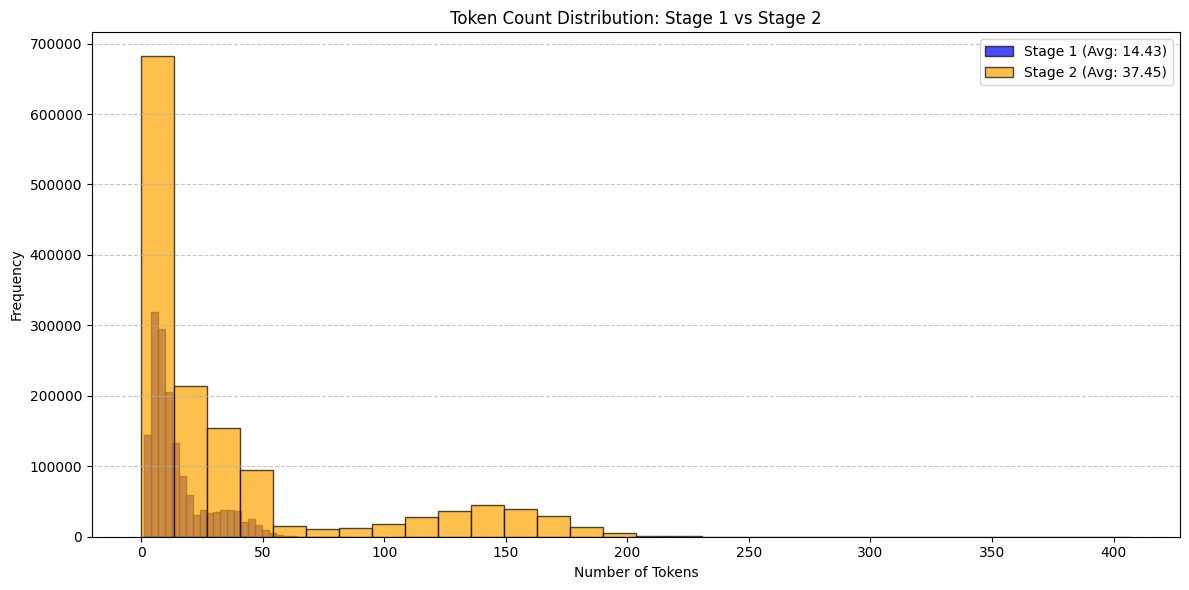

In [14]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

# JSON 파일 경로
stage1_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"
stage2_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

# 텍스트 전처리 및 토큰 길이 분석 함수
def analyze_token_lengths(json_file_path):
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    annotations = data['annotation']
    texts = [item['text'] for item in annotations]

    # 텍스트 전처리 (소문자, 알파벳/공백만 남기기)
    processed_texts = []
    for txt in texts:
        txt = txt.lower()
        txt = re.sub(r'[^a-z\s]', '', txt)
        txt = re.sub(r'\s+', ' ', txt).strip()
        processed_texts.append(txt)

    # 토큰화 및 길이 분석
    tokenized_texts = [txt.split() for txt in processed_texts]
    lengths = [len(tokens) for tokens in tokenized_texts]  # 각 문장의 토큰 수
    return lengths

# Stage 1과 Stage 2의 토큰 길이 분석
stage1_lengths = analyze_token_lengths(stage1_train_json)
stage2_lengths = analyze_token_lengths(stage2_train_json)

# 평균 토큰 수 계산
avg_stage1 = np.mean(stage1_lengths)
avg_stage2 = np.mean(stage2_lengths)

# 결과 출력
print(f"Stage 1 평균 출력 토큰 수: {avg_stage1:.2f}")
print(f"Stage 2 평균 출력 토큰 수: {avg_stage2:.2f}")

# 시각화: Stage 1과 Stage 2 히스토그램 비교
plt.figure(figsize=(12, 6))
plt.hist(stage1_lengths, bins=30, alpha=0.7, label=f"Stage 1 (Avg: {avg_stage1:.2f})", color='blue', edgecolor='black')
plt.hist(stage2_lengths, bins=30, alpha=0.7, label=f"Stage 2 (Avg: {avg_stage2:.2f})", color='orange', edgecolor='black')
plt.title("Token Count Distribution: Stage 1 vs Stage 2")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Stage1 이 평균 몇 문장으로 구성되어 있는 지 확인


Total number of texts: 1573558
Average sentences per text: 1.08
Median sentences per text: 1.00
Max sentences in a text: 19
Min sentences in a text: 1


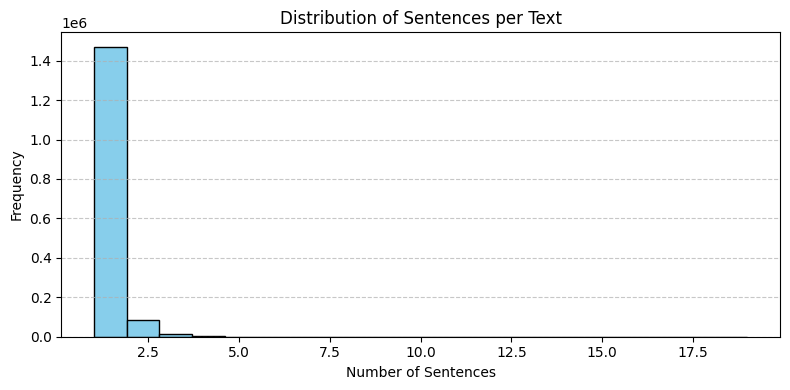

In [15]:
import re

# JSON 파일 경로
json_file_path = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"

# JSON 파일 로드
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

annotations = data['annotation']
texts = [item['text'] for item in annotations]

# 문장 수 계산
sentence_counts = []
for txt in texts:
    # 소문자 변환 (선택 사항)
    txt = txt.lower()
    # 정규식을 사용하여 문장 분리 (마침표, 물음표, 느낌표 기준)
    sentences = re.split(r'[.!?]', txt)
    # 빈 문자열 제거
    sentences = [s.strip() for s in sentences if s.strip()]
    sentence_counts.append(len(sentences))

# 결과 출력
print(f"Total number of texts: {len(texts)}")
print(f"Average sentences per text: {np.mean(sentence_counts):.2f}")
print(f"Median sentences per text: {np.median(sentence_counts):.2f}")
print(f"Max sentences in a text: {np.max(sentence_counts)}")
print(f"Min sentences in a text: {np.min(sentence_counts)}")

# 시각화
plt.figure(figsize=(8, 4))
plt.hist(sentence_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentences per Text")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Stage2 가 평균 몇 문장으로 구성되어 있는 지 확인


Total number of texts: 1403890
Average sentences per text: 1.02
Median sentences per text: 1.00
Max sentences in a text: 14
Min sentences in a text: 1


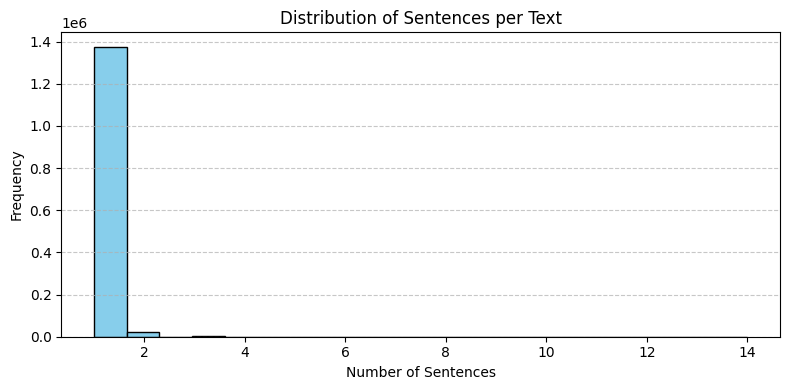

In [16]:
import re

# JSON 파일 경로
json_file_path = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

# JSON 파일 로드
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

annotations = data['annotation']
texts = [item['text'] for item in annotations]

# 문장 수 계산
sentence_counts = []
for txt in texts:
    # 소문자 변환 (선택 사항)
    txt = txt.lower()
    # 정규식을 사용하여 문장 분리 (마침표, 물음표, 느낌표 기준)
    sentences = re.split(r'[.!?]', txt)
    # 빈 문자열 제거
    sentences = [s.strip() for s in sentences if s.strip()]
    sentence_counts.append(len(sentences))

# 결과 출력
print(f"Total number of texts: {len(texts)}")
print(f"Average sentences per text: {np.mean(sentence_counts):.2f}")
print(f"Median sentences per text: {np.median(sentence_counts):.2f}")
print(f"Max sentences in a text: {np.max(sentence_counts)}")
print(f"Min sentences in a text: {np.min(sentence_counts)}")

# 시각화
plt.figure(figsize=(8, 4))
plt.hist(sentence_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentences per Text")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [17]:
import json
import random

# JSON 파일 경로
stage1_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"
stage2_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

# JSON 데이터 로드 함수
def load_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# 랜덤으로 텍스트 추출 함수
def extract_random_texts(json_data, sample_size=100):
    texts = [item['text'] for item in json_data['annotation']]
    return random.sample(texts, min(sample_size, len(texts)))

# JSON 데이터 로드
stage1_data = load_json(stage1_train_json)
stage2_data = load_json(stage2_train_json)

# 텍스트 랜덤 추출
stage1_texts = extract_random_texts(stage1_data)
stage2_texts = extract_random_texts(stage2_data)

# 결과 출력
print("Stage 1 Text Samples:")
for i, text in enumerate(stage1_texts, 1):
    print(f"{i}. {text}")

print("\nStage 2 Text Samples:")
for i, text in enumerate(stage2_texts, 1):
    print(f"{i}. {text}")


Stage 1 Text Samples:
1. And this year,
2. He imagined that the business which took him to london might be concluded in three or four days but as we are certain it cannot be so and at the same time convinced that when charles gets to town he will be in no hurry to leave it again
3. Kate ryan had come a long way from taffeta dresses and the parlour rooms of seattle.
4. An aircraft is flying over.
5. They were rushed into a number of very small boats,
6. I wouldn't!
7. The police come knocking on the door,
8. Leave this on core audio i would.
9. A flock of birds is taking off, flying past and landing, then calling. Other birds are chirping.
10. I'm going to take my arts course right here at green gables, and study everything that i would at college.
11. That he had armor sufficient for seventy thousand men ready in his armory.
12. When she was more tractable,
13. Leave this hot old stupid house top and come live in my cool moist wady shady swamp
14. The nostalgia,
15. A few moments of si

In [21]:
import json
import random

# JSON 파일 경로
stage1_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"
stage2_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

# JSON 데이터 로드 함수
def load_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# 랜덤으로 텍스트 추출 함수
def extract_random_texts(json_data, sample_size=1500):
    texts = [item['text'] for item in json_data['annotation']]
    return random.sample(texts, min(sample_size, len(texts)))

# 최대/최소 길이 텍스트 추출 함수
def get_max_min_texts(json_data):
    texts = [item['text'] for item in json_data['annotation']]
    max_text = max(texts, key=len)
    min_text = min(texts, key=len)
    return max_text, min_text

# 결과를 파일에 저장하는 함수
def save_results_to_file(file_path, stage1_texts, stage2_texts, stage1_max_text, stage1_min_text, stage2_max_text, stage2_min_text):
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write("Stage 1 Text Samples:\n")
        for i, text in enumerate(stage1_texts, 1):
            f.write(f"{i}. {text}\n")

        f.write("\nStage 2 Text Samples:\n")
        for i, text in enumerate(stage2_texts, 1):
            f.write(f"{i}. {text}\n")

        f.write("\nStage 1 Longest Text:\n")
        f.write(f"Length: {len(stage1_max_text)}\n{stage1_max_text}\n")
        f.write("\nStage 1 Shortest Text:\n")
        f.write(f"Length: {len(stage1_min_text)}\n{stage1_min_text}\n")

        f.write("\nStage 2 Longest Text:\n")
        f.write(f"Length: {len(stage2_max_text)}\n{stage2_max_text}\n")
        f.write("\nStage 2 Shortest Text:\n")
        f.write(f"Length: {len(stage2_min_text)}\n{stage2_min_text}\n")

# JSON 데이터 로드
stage1_data = load_json(stage1_train_json)
stage2_data = load_json(stage2_train_json)

# 텍스트 랜덤 추출
stage1_texts = extract_random_texts(stage1_data)
stage2_texts = extract_random_texts(stage2_data)

# 최대/최소 길이 텍스트 추출
stage1_max_text, stage1_min_text = get_max_min_texts(stage1_data)
stage2_max_text, stage2_min_text = get_max_min_texts(stage2_data)

# 결과를 파일로 저장
output_file_path = r"C:\Users\User\Desktop\aitech_last\text_analysis_results.txt"
save_results_to_file(output_file_path, stage1_texts, stage2_texts, stage1_max_text, stage1_min_text, stage2_max_text, stage2_min_text)

print(f"Results have been saved to {output_file_path}")


Results have been saved to C:\Users\User\Desktop\aitech_last\text_analysis_results.txt


In [22]:
import json

# JSON 파일 경로
stage1_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage1_train.json"
stage2_train_json = r"C:\Users\User\Desktop\aitech_last\boostcamp-7th-nota-hackathon-aac\stage2_train.json"

# Refactor된 JSON 저장 경로
refactored_stage1_json = r"C:\Users\User\Desktop\aitech_last\refactored_stage1_train.json"
refactored_stage2_json = r"C:\Users\User\Desktop\aitech_last\refactored_stage2_train.json"

# JSON 포매팅 함수
def refactor_json(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=4, ensure_ascii=False, sort_keys=True)

    print(f"Refactored JSON saved to {output_path}")

# JSON 파일 포매팅 실행
refactor_json(stage1_train_json, refactored_stage1_json)
refactor_json(stage2_train_json, refactored_stage2_json)


Refactored JSON saved to C:\Users\User\Desktop\aitech_last\refactored_stage1_train.json
Refactored JSON saved to C:\Users\User\Desktop\aitech_last\refactored_stage2_train.json


In [12]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import nltk

# Punkt 데이터 다운로드
nltk.download('punkt')
# 데이터 다운로드 경로 설정
nltk.data.path.append('C:\\Users\\User\\nltk_data')
nltk.download('punkt', download_dir='C:\\Users\\User\\nltk_data')



[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\User\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk
nltk.download('stopwords')
import nltk

# Punkt 모델 다운로드
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])  # 상위 10개의 영어 불용어 출력


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


한 audio 에 몇 문장 있는 지 확인.